In [1]:
import pandas as pd 
import numpy as np 
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("conjointData.csv")
df.head()

,Rating,Career,Fitness,Humor,Religiosity,Interests
0,1,FineArts,NotFit,Serious,SomRel,ShareSome
1,1,Business,VeryFit,Serious,VeryRel,VeryDiff
2,1,Business,NotFit,SomeFunny,NotRel,VeryDiff
3,2,Science,VeryFit,Serious,SomRel,ShareSome
4,2,Business,SomeFit,VeryFunny,VeryRel,ShareSome


In [3]:
#pd.concat([df["Rating"],pd.get_dummies(df[df.columns[1:]])],axis=1)

In [4]:
df_add= sm.add_constant(df)
#df_add.head()
LR= ols('Rating ~Career+Fitness+Humor+Religiosity+Interests', data=df_add).fit()
LR.summary()

C:\Users\POPO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\POPO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     9.532
Date:                Thu, 28 Nov 2019   Prob (F-statistic):            0.00339
Time:                        21:30:00   Log-Likelihood:                -10.322
No. Observations:                  18   AIC:                             42.64
Df Residuals:                       7   BIC:                             52.44
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.6818      0.547      1.246      0.253      -0.612       1.975
Career[T.FineArts]         0.8333      0.398      2.096      0.074      -0.107       1.773
Career[T.Science]          0.1667      0.398      0.419      0.688      -0.773       1.107
Fitness[T.SomeFit]         2.3333      0.398      5.870      0.001       1.393       3.273
Fitness[T.VeryFit]         1.6667      0.398      4.193      0.004       0.727       2.607
Humor[T.SomeFunny]         1.3636      0.415      3.284      0.013       0.382       2.345
Humor[T.VeryFunny]         1.8182      0.415      4.379      0.003       0.836       2.800
Religiosity[T.SomRel]      0.8182      0.415      1.971      0.089      -0.164       1.800
Religiosity[T.VeryRel]    -1.5455      0.415     -3.722      0.007      -2.527      -0.564
Interests[T.ShareSome]    -1.3333      0.398     -3.354      0.012      -2.273      -0.393
Interests[T.VeryDiff]     -0.6667      0.398     -1.677      0.137      -1.607       0.273
==============================================================================
Omnibus:                        0.291   Durbin-Watson:                   2.714
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.458
Skew:                           0.171   Prob(JB):                        0.795
Kurtosis:                       2.297   Cond. No.                         6.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
res=LR
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)
df_res.head()

,param_name,param_w,pval,abs_param_w,is_sig_95,c
Career[T.Science],Career[T.Science],0.166667,0.687576,0.166667,False,red
Interests[T.VeryDiff],Interests[T.VeryDiff],-0.666667,0.137417,0.666667,False,red
Intercept,Intercept,0.681818,0.252721,0.681818,False,red
Religiosity[T.SomRel],Religiosity[T.SomRel],0.818182,0.089402,0.818182,False,red
Career[T.FineArts],Career[T.FineArts],0.833333,0.074263,0.833333,False,red


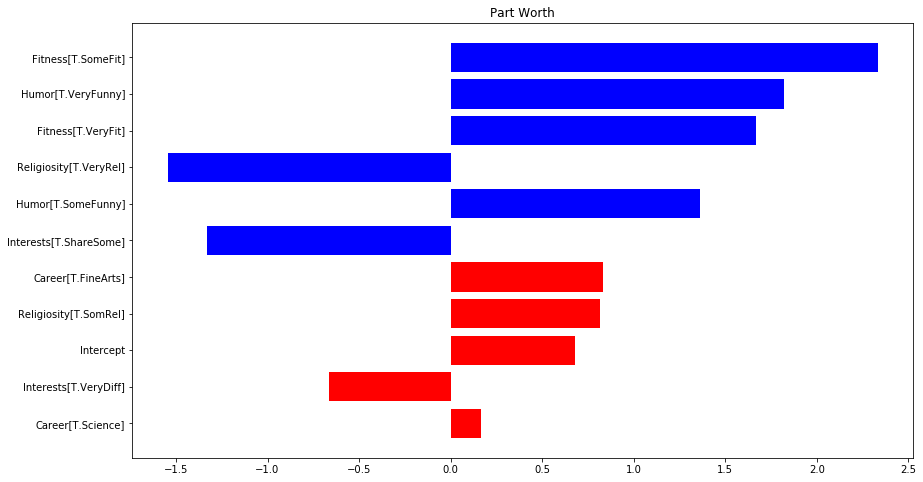

In [6]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [7]:
#list(res.params.items())
for key, coeff in res.params.items():
    print(key,coeff)

Intercept 0.6818181818181805
Career[T.FineArts] 0.8333333333333346
Career[T.Science] 0.16666666666666596
Fitness[T.SomeFit] 2.3333333333333353
Fitness[T.VeryFit] 1.666666666666666
Humor[T.SomeFunny] 1.363636363636364
Humor[T.VeryFunny] 1.8181818181818188
Religiosity[T.SomRel] 0.8181818181818179
Religiosity[T.VeryRel] -1.5454545454545467
Interests[T.ShareSome] -1.3333333333333335
Interests[T.VeryDiff] -0.6666666666666663


In [8]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    feature=key.split("[")[0]
    if feature not in range_per_feature:
        range_per_feature[feature] = [0]   
    range_per_feature[feature].append(coeff)
del range_per_feature['Intercept']
range_per_feature

{'Career': [0, 0.8333333333333346, 0.16666666666666596],
 'Fitness': [0, 2.3333333333333353, 1.666666666666666],
 'Humor': [0, 1.363636363636364, 1.8181818181818188],
 'Religiosity': [0, 0.8181818181818179, -1.5454545454545467],
 'Interests': [0, -1.3333333333333335, -0.6666666666666663]}

In [9]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}
# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}

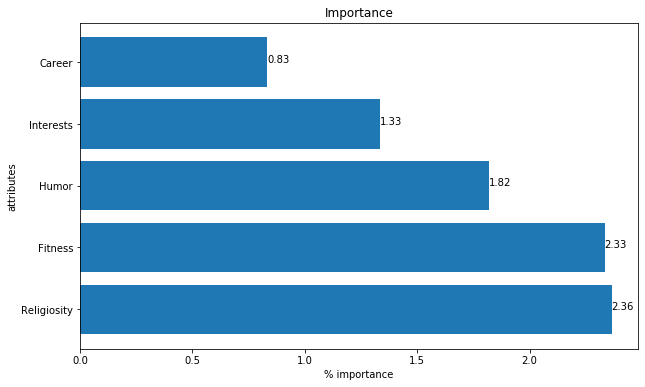

In [10]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(10, 6))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v ,i, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

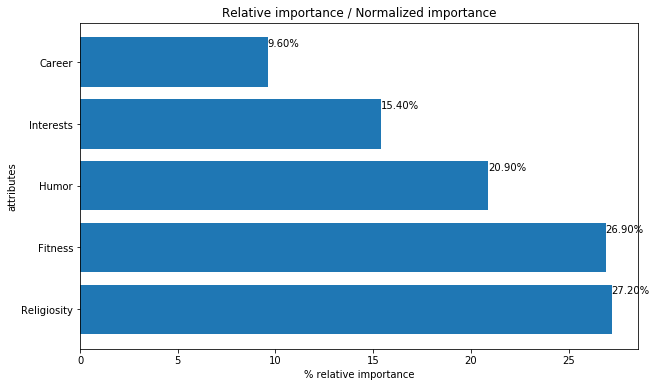

In [11]:
alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()), 
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)


f, ax = plt.subplots(figsize=(10, 6))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

In [12]:
#pd.get_dummies(df[df.columns[1:]])
ans=[]
for i in range_per_feature.values():
    ans.append(i)
!pip install iteration_utilities
from iteration_utilities import deepflatten
new=list(deepflatten(ans))

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [13]:
utility_scores=np.dot(np.array(pd.get_dummies(df[df.columns[1:]])),np.array(new))#+res.params["Intercept"]
utility_scores

array([ 0.31818182, -0.54545455,  0.6969697 ,  1.31818182,  1.27272727,
        0.43939394, -0.01515152,  4.96969697,  1.83333333,  3.86363636,
        1.65151515,  0.65151515,  0.81818182,  4.46969697,  1.6969697 ,
        3.16666667,  4.01515152,  2.10606061])

In [14]:
max_utility = np.argmax(utility_scores)
print (df.ix[max_utility])

Rating                 6
Career          Business
Fitness          SomeFit
Humor          VeryFunny
Religiosity       SomRel
Interests      Identical
Name: 7, dtype: object


C:\Users\POPO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


# The ideal product for this consumer has the following attribute levels
Fine Arts,Some. Fit,Very Funny,Some. Religious,Identical

In [15]:
#First Choice Rule/Maximum Utility Rule